Brody Vogel (bsv9)

ANLY 590; HW 2


1. Autoencoder

I trained the encoder to have two convolutional layers; the first uses twenty-five 3x3 kernels, while the second uses forty 5x5 kernels (with a Dropout constant of 0.1). I then down-sampled the 28x28 output therefrom to a 14x14 squeeze layer with Max Pooling. 

I trained the decoder to have the same properties as the encoder, modified for the reduced size of the encoded image; I also added another convolutional layer with only 1 kernel to get the dimensions to match-up. I then up-sampled the output back to a 28x28 image.

I used Same padding throughout to keep the dimensions in-line.

I optimized the model using the Adam optimizer and binary cross-entropy as my loss function. I only trained on five epochs, though, because of runtime, and because it didn't seem like my network was learning anything more. 

With these setting, I got a model accuracy of about 70 percent. As the reconstructed images below show, this doesn't appear to be too bad, although a lot of detail is lost in the images. 

In [0]:
# import the necessary libraries

import tensorflow as tf
import keras
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import random

In [0]:
# import all the Keras stuff
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Activation, Flatten, SimpleRNN, LSTM, Embedding
from keras.layers import Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, UpSampling2D
from keras.utils import np_utils
from keras.preprocessing import sequence

#import the data
from keras.datasets import fashion_mnist

In [79]:
# load the MNIST data into the environment
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
#plt.imshow(X_train[100])

4423680/4422102 [==============================] - 2s 0us/step


In [0]:
# handle the data and assign the output to one of 10 categories
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# We do this through one-hot encoding
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [81]:

model = Sequential()
# here's the encoder part
model.add(Conv2D(filters = 25,kernel_size=(3, 3), 
                 activation='relu', strides=(1, 1), 
                 padding='same',
                 input_shape=(28,28,1)))
model.add(Dropout(0.1))
model.add(Conv2D(filters = 40,kernel_size=(5, 5), 
                 activation='relu', strides=(1, 1), 
                 padding='same', 
                 input_shape=(28,28,1)))
# the down-sampling
model.add(MaxPooling2D(pool_size=(2, 2)))
# the decoder part
model.add(Conv2D(filters = 25,kernel_size=(3, 3), 
                 activation='relu', strides=(1, 1), 
                 padding='same', 
                 input_shape=(12,12,1)))
model.add(Dropout(0.1))
model.add(Conv2D(filters = 40,kernel_size=(5, 5), 
                 activation='relu', strides=(1, 1), 
                 padding='same', 
                 input_shape=(12,12,1)))
model.add(Conv2D(filters = 1,kernel_size=(3, 3), 
                 activation='sigmoid', strides=(1, 1), 
                 padding='same', 
                 input_shape=(12,12,1)))
model.add(UpSampling2D(size = (2, 2)))
model.compile(optimizer='adam', loss='binary_crossentropy')
model.fit(X_train, X_train,
                epochs=5,
                batch_size=128,
                shuffle=True,
                validation_data=(X_test, X_test),
                verbose = True)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 12s 199us/step - loss: 0.3081 - val_loss: 0.2906
Epoch 2/5
60000/60000 [==============================] - 11s 175us/step - loss: 0.2887 - val_loss: 0.2890
Epoch 3/5
60000/60000 [==============================] - 10s 175us/step - loss: 0.2878 - val_loss: 0.2887
Epoch 4/5
60000/60000 [==============================] - 11s 175us/step - loss: 0.2874 - val_loss: 0.2885
Epoch 5/5
60000/60000 [==============================] - 11s 175us/step - loss: 0.2872 - val_loss: 0.2883


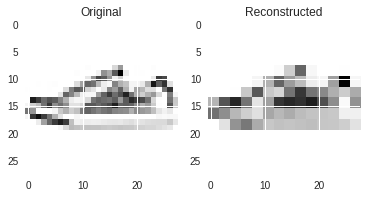

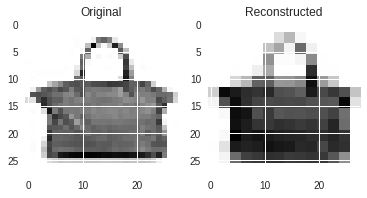

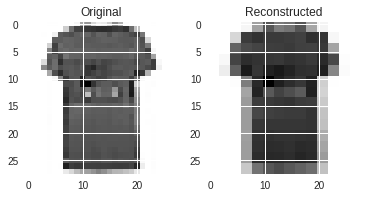

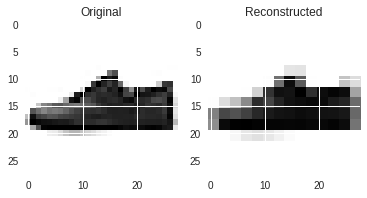

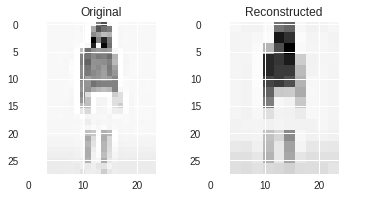

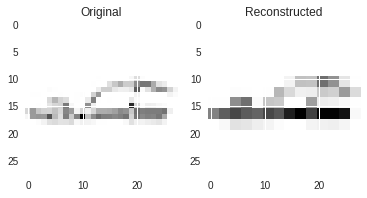

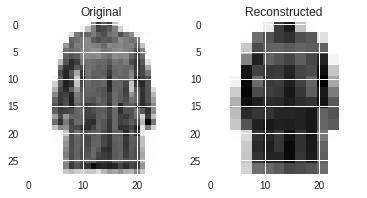

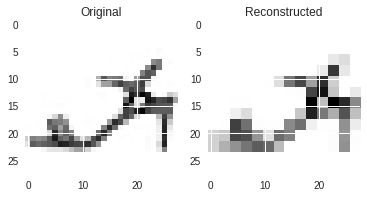

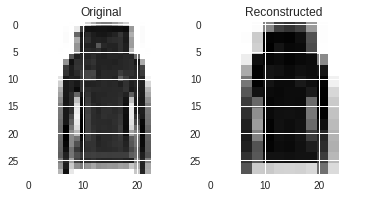

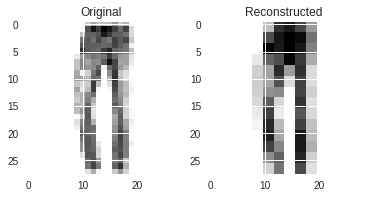

In [82]:
# random sample 
samp = random.sample(range(1, 60000), 10)
# random sample from the training set
preds = model.predict(X_train[samp])
# see how it did by plotting the original and reconstructed image
for x in range(len(preds)):
  plt.figure()
  plt.subplot(1, 2, 1)
  plt.title('Original')
  plt.imshow(X_train[samp[x]].reshape(28, 28))
  plt.subplot(1, 2, 2)
  plt.title('Reconstructed')
  plt.imshow(preds[x].reshape(28, 28))

2.1 Deep CNN

I trained a deep CNN with two convolutional layers, followed by a down-sampled Max Pooling layer, another convolutional layer, a Flatten layer, then two Dense layers. 

I added more kernels to the deeper convolutional layers because there are more possible, complex relationships that could possibly be discovered. I went with Valid padding because, for this classification task, I wasn't that worried about keeping track of the dimensions, and Valid padding was a little more accurate than Same. I used a Stride of 1 because I wasn't worried about overusing pixels or compuation time.

I down-sampled to cut some of the noise out of the process; the same reasoning was behind my use of Dropout, too. 

I added the Flatten and Dense layers to form a Feature Extractor that can actually classify the interesting features the convolutional layers discovered. I then used a 10-class softmax function to classify the output.

With 15 epochs, I got an accuracy rate over 95 percent on the train set and over 92 percent on the test set. 

In [0]:
# instantiate the model
model = Sequential()
# add a few convolutional layers
model.add(Conv2D(filters = 32,kernel_size=(3, 3), 
                 activation='relu', strides=(1, 1), 
                 padding='valid',
                 input_shape=(28,28,1)))
model.add(Conv2D(filters = 50,kernel_size=(5, 5), 
                 activation='relu', strides=(1, 1), 
                 padding='valid', input_shape=(28,28,1)))
# add a down-sampling layer
model.add(MaxPooling2D(pool_size=(2,2)))
# some Dropout
model.add(Dropout(0.25))
# another convolutional layer
model.add(Conv2D(filters = 40,kernel_size=(3, 3), 
                 activation='relu', strides=(1, 1), 
                 padding='valid'))
# flatten and dense layers for Feature Extractor
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
# compile
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
             metrics = ['accuracy'])
# fit the model
history = model.fit(X_train, Y_train,
          epochs=15,
          batch_size=128,
         verbose = 0)

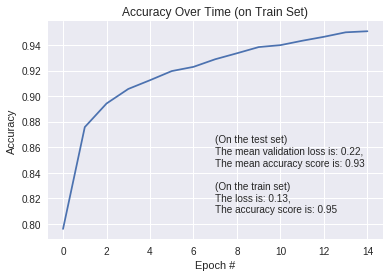

In [84]:
# evaluate the model
score = model.evaluate(X_test, Y_test, batch_size=64, verbose = 0)

# for the plot
overlaid_text = (
"""
(On the test set)
The mean validation loss is: {mean_test_loss},
The mean accuracy score is: {mean_test_accuracy}

(On the train set)
The loss is: {mean_train_loss},
The accuracy score is: {mean_train_accuracy}
""".format(mean_test_loss = np.round(score[0], 2),
           mean_test_accuracy = np.round(score[1], 2),
            mean_train_loss = np.round(history.history['loss'][14], 2),
            mean_train_accuracy = np.round(history.history['acc'][14], 2)))

# see how we did
plt.title('Accuracy Over Time (on Train Set)')
plt.xlabel('Epoch #')
plt.ylabel('Accuracy')
plt.text(7, .8, overlaid_text)
plt.plot(history.history['acc'])
plt.show()

2.2 Transfer Learning

I used the VGG16 pre-trained model. It wasn't perfect. I had to find a way to make the images a little larger to fit VGG16's minimum requirements (the images in the MNIST fashion data are 28x28, but the smallest images VGG16 accepts are 32x32). I also had to make the balck and white MNIST fashion images 3-channeled, also to meet VGG16's requirements. 

This actually had worse results than the simpler model trained in (2.1). The VGG16 pre-trained model produced accuracy scores of 91 percent and 87 percent on the train and test data, respectively. I'm assuming this is because of 1) overfitting, or 2) the modifications I had to make to the input images. In the case of the former, this data set may be too simple for the complexities of this pre-trained model; in the latter, the distortion added by modifying the images caused problems when it came time to classify them. 

In any case, the results are visualized below.

In [85]:
# for resizing the images
import cv2
# the pre-trained model
from keras.applications.vgg16 import VGG16
# get a new copy of the training and test data
(X_train1, y_train1), (X_test1, y_test1) = fashion_mnist.load_data()
# modify the data appropriately, as before
X_train1 = X_train1.reshape(X_train1.shape[0], 28, 28,1)
X_test1 = X_test1.reshape(X_test1.shape[0], 28, 28,1)

X_train1 = X_train1.astype('float32')
X_test1 = X_test1.astype('float32')
X_train1 /= 255
X_test1 /= 255

Y_train1 = np_utils.to_categorical(y_train1, 10)
Y_test1 = np_utils.to_categorical(y_test1, 10)

  # these three parts change the shape of the image, resize it to account for
    # channels, and then squeeze it down to a 3-dimensional tensor
X_train1 = np.asarray([cv2.resize(i, (32,32)) for i in X_train1])
X_test1 = np.asarray([cv2.resize(i, (32,32)) for i in X_test1])

X_train1 = X_train1.reshape(X_train1.shape[0], 32, 32,1)
X_test1 = X_test1.reshape(X_test1.shape[0], 32, 32, 1)

X_train1 = np.asarray([np.squeeze(np.stack((i, )*3, axis = -1)) for i in X_train1])
X_test1 = np.asarray([np.squeeze(np.stack((i, )*3, axis = -1)) for i in X_test1])

# load the base model
conv_base = VGG16(weights="imagenet",include_top=False,input_shape=(32,32,3))

# fit the model
model = Sequential()
model.add(conv_base)
# add our Feature Extractor
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dense(10, activation="softmax"))

# freeze the base model weights
conv_base.trainable = False
# compile
model.compile(loss="categorical_crossentropy", 
              optimizer='adam',
              metrics=["acc"])
# fit
history = model.fit(X_train1, Y_train1,
          epochs=15,
          batch_size=128,
         verbose = 1)

58892288/58889256 [==============================] - 5s 0us/step
Epoch 1/15
60000/60000 [==============================] - 21s 345us/step - loss: 0.5857 - acc: 0.7983
Epoch 2/15
60000/60000 [==============================] - 19s 314us/step - loss: 0.4223 - acc: 0.8461
Epoch 3/15
60000/60000 [==============================] - 19s 314us/step - loss: 0.3880 - acc: 0.8585
Epoch 4/15
60000/60000 [==============================] - 19s 315us/step - loss: 0.3674 - acc: 0.8654
Epoch 5/15
60000/60000 [==============================] - 19s 314us/step - loss: 0.3502 - acc: 0.8706
Epoch 6/15
60000/60000 [==============================] - 19s 315us/step - loss: 0.3358 - acc: 0.8757
Epoch 7/15
60000/60000 [==============================] - 19s 315us/step - loss: 0.3255 - acc: 0.8790
Epoch 8/15
60000/60000 [==============================] - 19s 316us/step - loss: 0.3120 - acc: 0.8848
Epoch 9/15
60000/60000 [==============================] - 19s 316us/step - loss: 0.3057 - acc: 0.8872
Epoch 10/15
60000

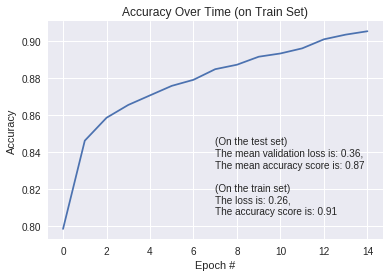

In [86]:
# evaluate the model
score = model.evaluate(X_test1, Y_test1, batch_size=64, verbose = 0)

# for the plot
overlaid_text = (
"""
(On the test set)
The mean validation loss is: {mean_test_loss},
The mean accuracy score is: {mean_test_accuracy}

(On the train set)
The loss is: {mean_train_loss},
The accuracy score is: {mean_train_accuracy}
""".format(mean_test_loss = np.round(score[0], 2),
           mean_test_accuracy = np.round(score[1], 2),
            mean_train_loss = np.round(history.history['loss'][14], 2),
            mean_train_accuracy = np.round(history.history['acc'][14], 2)))

# see how we did
plt.title('Accuracy Over Time (on Train Set)')
plt.xlabel('Epoch #')
plt.ylabel('Accuracy')
plt.text(7, .8, overlaid_text)
plt.plot(history.history['acc'])
plt.show()

3.1 RNN

With a vanilla 128-cell LSTM, I got a training and test accuracy of around 98 percent. More epochs didn't really improve the accuracy. The loss went down a bit with more epochs, though, so, I guess the improvement the added epochs brought was that the model made fewer large mistakes in its estimation of whether some URLs were benign or dangerous (that is, more training epochs made the model less likely to predict a high likelihood of a URL being dangerous when the URL is in fact benign, and vice-versa).

In [3]:
# the files are stored in my Google Drive
from google.colab import drive

drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [0]:
from keras.preprocessing.text import Tokenizer

# get the files of good and bad URLs
benign_path = "/content/gdrive/My Drive/Benign.txt"

with open(benign_path,"r") as f:
  benign = f.read()
  
dangerous_path = "/content/gdrive/My Drive/Dangerous.txt"

with open(dangerous_path,"r") as f:
  dangerous = f.read()

benign_list = benign.split('\n')
benign_list = [x for x in benign_list if '#' not in x]
benign_list = [list(x) for x in benign_list]

dangerous_list = dangerous.split('\n')
dangerous_list = [x for x in dangerous_list if '#' not in x]
dangerous_list = [list(x) for x in dangerous_list]

# convert to arrays
benign_array = np.asarray(benign_list)
dangerous_array = np.asarray(dangerous_list)

all_urls = np.concatenate((benign_array, dangerous_array))

# Building the word index
tokenizer = Tokenizer(num_words = 1000)
tokenizer.fit_on_texts(all_urls)

samples = tokenizer.texts_to_sequences(all_urls)

samples = sequence.pad_sequences(samples, maxlen = 86)

# make the training and test data
X = np.zeros((len(all_urls), 86), dtype=np.uint8)
Y = np.zeros((len(all_urls), 1), dtype=np.uint8)

for i in range(len(benign_list)):
  X[i, :] = samples[i]
  Y[i] = 0
             
for i in range(len(dangerous_list)):
  X[(len(benign_list)+i), :] = samples[i]
  Y[(len(benign_list)+i)] = 1
        

# train / test split        
indices = [x for x in range(0, len(all_urls))]
random.shuffle(indices)

X_train = X[indices[0:40000], :]
Y_train = Y[indices[0:40000]]

X_test = X[indices[40000:], :]
Y_test = Y[indices[40000:]]

In [67]:
# build, compile, and fit the model

model = Sequential()
# embedding layer
model.add(Embedding(86, 64))
# LSTM
model.add(LSTM(128))
model.add(Dense(1, activation ='sigmoid'))

model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics=['acc'])

history = model.fit(X_train, Y_train, 
                    epochs = 5, batch_size = 128, 
                    verbose=1)


Epoch 1/5
40000/40000 [==============================] - 61s 2ms/step - loss: 0.0831 - acc: 0.9793
Epoch 2/5
40000/40000 [==============================] - 59s 1ms/step - loss: 0.0476 - acc: 0.9792
Epoch 3/5
40000/40000 [==============================] - 58s 1ms/step - loss: 0.0433 - acc: 0.9799
Epoch 4/5
40000/40000 [==============================] - 59s 1ms/step - loss: 0.0397 - acc: 0.9802
Epoch 5/5
40000/40000 [==============================] - 59s 1ms/step - loss: 0.0383 - acc: 0.9798


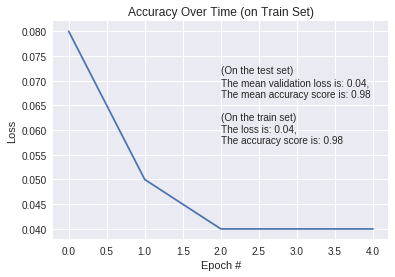

In [69]:
# evaluate the model
#score = model.evaluate(X_test, Y_test, batch_size=64, verbose = 1)

# for the plot
overlaid_text = (
"""
(On the test set)
The mean validation loss is: {mean_test_loss},
The mean accuracy score is: {mean_test_accuracy}

(On the train set)
The loss is: {mean_train_loss},
The accuracy score is: {mean_train_accuracy}
""".format(mean_test_loss = np.round(score[0], 2),
           mean_test_accuracy = np.round(score[1], 2),
            mean_train_loss = np.round(history.history['loss'][4], 2),
            mean_train_accuracy = np.round(history.history['acc'][4], 2)))

# see how we did
plt.title('Accuracy Over Time (on Train Set)')
plt.xlabel('Epoch #')
plt.ylabel('Loss')
plt.text(2, .055, overlaid_text)
plt.plot(np.round(history.history['loss'], 2))
plt.show()

3.2 CNN

Using a CNN for the same task, then, I again got a train and test accuracy above 98 percent. Once again, more epochs didn't do much in terms of improving my results. And, once more, more epochs lowered the loss a bit, so the same conclusions can be drawn as for the LSTM.


In [70]:
# build, compile, and fit the model using Conv1D
model1 = Sequential()
  # embedding layer
model1.add(Embedding(86, input_length = 86, output_dim = 32))
    # convolutional layers
model1.add(Conv1D(32, 3,
                 activation='relu'))
model1.add(Dropout(0.5))
model1.add(Conv1D(64, 5, 
                 activation='relu'))
model1.add(Flatten())    
model1.add(Dense(1, activation ='sigmoid'))

model1.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics=['acc'])

history1 = model1.fit(X_train, Y_train, 
                    epochs = 8, batch_size = 64, 
                    verbose=1)


Epoch 1/8
40000/40000 [==============================] - 6s 140us/step - loss: 0.0651 - acc: 0.9802
Epoch 2/8
40000/40000 [==============================] - 5s 124us/step - loss: 0.0421 - acc: 0.9804
Epoch 3/8
40000/40000 [==============================] - 5s 123us/step - loss: 0.0384 - acc: 0.9805
Epoch 4/8
40000/40000 [==============================] - 5s 123us/step - loss: 0.0370 - acc: 0.9802
Epoch 5/8
40000/40000 [==============================] - 5s 122us/step - loss: 0.0348 - acc: 0.9799
Epoch 6/8
40000/40000 [==============================] - 5s 125us/step - loss: 0.0345 - acc: 0.9808
Epoch 7/8
40000/40000 [==============================] - 5s 124us/step - loss: 0.0337 - acc: 0.9809
Epoch 8/8
40000/40000 [==============================] - 5s 124us/step - loss: 0.0333 - acc: 0.9804


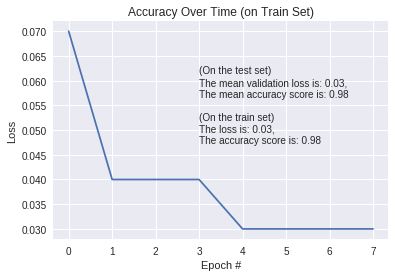

In [76]:
# evaluate the model
#score = model1.evaluate(X_test, Y_test, batch_size=64, verbose = 0)

# for the plot
overlaid_text = (
"""
(On the test set)
The mean validation loss is: {mean_test_loss},
The mean accuracy score is: {mean_test_accuracy}

(On the train set)
The loss is: {mean_train_loss},
The accuracy score is: {mean_train_accuracy}
""".format(mean_test_loss = np.round(score[0], 2),
           mean_test_accuracy = np.round(score[1], 2),
            mean_train_loss = np.round(history1.history['loss'][4], 2),
            mean_train_accuracy = np.round(history1.history['acc'][4], 2)))

# see how we did
plt.title('Accuracy Over Time (on Train Set)')
plt.xlabel('Epoch #')
plt.ylabel('Loss')
plt.text(3, .045, overlaid_text)
plt.plot(np.round(history1.history['loss'], 2))
plt.show()

3.3 RNN vs CNN Comparison

The accuracies from the models were essentially identical. The losses, too, were nearly indistinguishable. The RNN (LSTM) had a loss that was a little higher than the CNN, but I'd bet this is because I trained the CNN for 3 more epochs; and the losses weren't noticeably far apart. The CNN fit a lot faster than the LSTM, though, so that would seemingly add some benefit to using the CNN. 

The zoomed-in ROC curves below seem to implicate the CNN did a bit better, but, again, I'd guess this is because I trained the CNN for 8 epochs instead of 5.

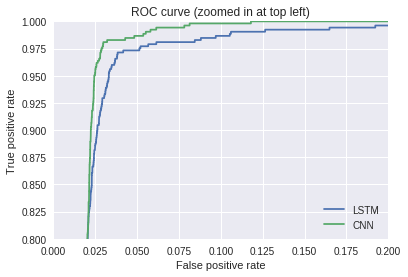

In [74]:
from sklearn.metrics import roc_curve
# a lot of this is from:
# https://hackernoon.com/simple-guide-on-how-to-generate-roc-plot-for-keras-classifier-2ecc6c73115a

#y_pred = model.predict(X_test).ravel()
#y_pred1 = model1.predict(X_test).ravel()

# false positive rates, true positive rates, and thresholds
fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
fpr1, tpr1, thresholds1 = roc_curve(Y_test, y_pred1)

# make the figure
plt.figure(1)
plt.xlim(0, 0.2)
# zoom it in
plt.ylim(.8, 1)
#plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='LSTM')
plt.plot(fpr1, tpr1, label='CNN')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()